# Multiple Random Variables

In the [previous section](ProbabilityUnivariate.ipynb) discrete and continuous random variables, the concept of probability and common distributions of random variables have been introduced.

Recall, that a a random variable $X$ is a variable that can take multiple values $X=x_i$ and the set of possible values, that can be taken by the variable is denoted by $V(X)$.

Now we consider the case of multiple random variables. In the case that we have only 2 or 3 of them we usually denote them by $X$, $Y$ and $Z$, respectively. In the general case of $N$ random variables they are denoted by $
X_1,X_2,\ldots, X_N$ and their corresponding values $x_1,x_2,\ldots, x_N$.

## Example to be used in this section

In [1]:
import pandas as pd
vacData=pd.read_excel("vaccinated20210409.xlsx",index_col=0)
vacData

,BionTech,AstraZeneca,Moderna
Vaccinated Once,7509918,690925,3480507
Vacinated Twice,4674351,225050,2491


In [2]:
sumAll=vacData.sum().sum()
print("Total number of vaccinated people in Germany by 09.04.2021: ",sumAll)

Total number of vaccinated people in Germany by 09.04.2021:  16583242


In this example we have two random variables: `Vaccinated` and `Vaccine`. For `Vaccinated` the value range is

$$V(\mbox{Vaccinated})=\left\{once,twice\right\}.$$

This means that we are just interested in the vaccinated people - all others are out of scope in our context.

For `Vaccine` the value range is 

$$V(\mbox{Vaccine})=\left\{BionTech, AstraZeneca, Moderna\right\}.$$

## Joint Probability

The **Joint Probability** of two random variables $X$ and $Y$ measures the probability that variable $X$ takes the value $x_i$ **and** $Y$ takes the value $y_j$:

$$
P(X=x_i,Y=y_j) \quad \mbox{ or for short} \quad P(x_i,y_j).
$$

Note, that the comma between the two variables stands for **and**. 

The set of all joint probabilites 
$$
P(X=x_i,Y=y_j)  \quad \forall \quad x_i \in V(X), y_j \in V(Y)
$$

is called the **Joint Probability Distribution** of the two variables.

In the example the Joint Probability Distribution can be obtained by just dividing the absolute numbers, given in the entries of the dataframe `vacData` by the total amount of vaccinated people (16.583.242):

In [3]:
probDist=vacData/sumAll
probDist

,BionTech,AstraZeneca,Moderna
Vaccinated Once,0.452862,0.041664,0.209881
Vacinated Twice,0.281872,0.013571,0.000150


Given this table, we know for example, that the probability that among the population of vaccinated people the probability that a person has been vaccinated once *and* the vaccine is *Moderna* is

$$
P(Vaccinated=once,Vaccine=Moderna)=0.21.
$$

Correspondingly the Joint Probability of $N$ random variables

$$
P(X_1=x_{i_1},X_2=x_{i_2}, \ldots, X_N=x_{i_N}) \quad \mbox{ or for short} \quad P(x_{i_1},x_{i_2}, \ldots, x_{i_N})
$$

measures the probability, that $X_1$ takes the value $x_{i_1}$ **and** $X_2$ takes the value $x_{i_2}$ **and**, ... $X_N$ takes the value $x_{i_N}$. The set of all Joint Probabilities for all possible values in the value range of the variables is called the Joint Probability of the given $N$ random variables.  

In the case of continuous variables, the joint probability distribution can be expressed either in terms of a joint cumulative distribution function (**cdf**) or in terms of a joint probability density function (**pdf**). For discrete random variables the probability mass function (**pmf**). These in turn can be used to find two other types of distributions: the [marginal distribution](#margProb) giving the probabilities for any one of the variables with no reference to any specific ranges of values for the other variables, and the [conditional probability distribution](#condprob). Both of them are described below.

<a id="independence"></a>
## Independence of random variables

Random variables can be dependent or independent. A pair of random variables $X$ and $Y$ is called independent, if the value of the value of the other has no influence on the value of the other. For example, if you roll a dice twice in a row, the result of the second roll will be completely independent of the result of the first roll.

If and only if the random variables $X$ and $Y$ are independent of each other, the conditional probabilty can be calculated by factorisation:

$$
P(X=x_{i},Y=y_j)= P(X=x_{i}) \cdot P(Y=y_j)
$$

For example, in the case of a regular dice, the probability, that in the first roll a *1* and in the second roll a *2* will be obtained is

$$
P(X=1,Y=2)= P(X=1) \cdot P(Y=2)=\frac{1}{6} \cdot \frac{1}{6} = \frac{1}{36}
$$

On the other hand experiments such as **Lotto**, where balls are drawn without laying them back are dependent: The result of the second draw certainly depends on the result of the first draw.

<a id="margProb"></a>
## Marginal Probability

The marginal distribution of a subset of a collection of random variables is the probability distribution of the variables contained in the subset. It gives the probabilities of various values of the variables in the subset without reference to the values of the other variables.

Assume the case that for a set of random variables $X_1,X_2,\ldots, X_N$ the Joint Probability Distribution, i.e. all probabilities of type

$$
P(X_1=x_{i_1},X_2=x_{i_2}, \ldots, X_N=x_{i_N}) 
$$

are known, but we interested in the Joint Probability Distribution of a subset 

$$
\left\{ X_{i_1},X_{i_2},\ldots, X_{i_Z} \right\} \subset \left\{ X_1,X_2,\ldots, X_N \right\},
$$
i.e. probabilities of type

$$
P(X_{i_1},X_{i_2},\ldots, X_{i_Z}). 
$$

How can we determine this Joint Probabilities of the subset?

The answer is: By marginalizing all random variables, which are not in the subset.

In the most simple case we have two random variables $X$ and $Y$ and we know all Joint Probabilities of type $P(X=x_i,Y=y_j)$. If we are interested in $P(X=x_i)$, we can obtain this value by marginalising variable $Y$, which means that we calculate the sum of the Joint Probabilities $P(X=x_i,Y=y_j)$ over all possible values $y_j \in V(Y)$.

**Marginalisation law:**

\begin{equation}
P(x_i)=\sum\limits_{y_j \in V(Y)} P(x_i,y_j)
\label{eq:marg} \tag{1}
\end{equation}

The **marginal variables** are those variables in the subset of variables being retained ($X$ in the equation above).

Similarly, in the case of 3 random variables $X,Y$ and $Z$ one can obtain the probabilities of the marginal variable $X$ from the Joint Probability Distribution of the 3 variables by marginalising $Y$ and $Z$:

$$
P(x_i)=\sum\limits_{y_j \in V(Y)} \sum\limits_{z_k \in V(Z)} P(x_i,y_j,z_k)
$$

This rule can easily be generalized to an arbitrary set of random variables and arbitrary subsets thereof.

In the *Vaccination Example* we can easily obtain the marginal probability $P(Vaccinated)$ for the variable `Vaccinated` by calculating the row-wise sum of the Joint Probability Table. Similarly, the marginal probability $P(Vaccine)$ for the variable `Vaccine` is the column-wise sum in the Joint Probability Table.  

Below the table of Joint Probabilities has been extended by an
* additional column, which contains the marginal probabilities $P(Vaccinated)$
* additional row, which contains the marginal probabilities $P(Vaccine)$

For example the marginal probability
* $P(Vaccine=BionTech)=0.73$
* $P(Vaccinated=Twice)=0.30$

In [4]:
margProb=probDist.copy()
margProb[" "]=probDist.sum(axis=1)
margProb.loc[" ",:]=margProb.sum(axis=0)
margProb
#marginCols

def highlight_margins(x):
    r = 'background-color: red'
    g = 'background-color: green'
    df1 = pd.DataFrame('', index=x.index, columns=x.columns)
    df1.iloc[:-1, -1] = r
    df1.iloc[-1, :-1] = g
    return df1  


margProb.style.apply(highlight_margins, axis=None)

,BionTech,AstraZeneca,Moderna,
Vaccinated Once,0.452862,0.041664,0.209881,0.704407
Vacinated Twice,0.281872,0.013571,0.000150,0.295593
,0.734734,0.055235,0.210031,1.000000


As can be seen here, the marginal probabilities are typically displayed  in the margins of the Joint Distribution Table.

**Independence Test:** As described in [subsection Independence](#independence), $P(X,Y)=P(X) \cdot P(Y)$, if and only if the two random variables are independent of each other. From the joint probability values and the marginal probabilities in the example above, we see that

$$
P(BionTech,Twice)=0.28
$$

and

$$
P(BionTech) \cdot P(Twice) = 0.73 \cdot 0.3 = 0.219
$$

are significantly different. Therefore the two variables are not independent of each other.

<a id="condprob"></a>
## Conditional Probability

Given two random variables $X$ and $Y$ the conditional probability 

$$
P(X=x_i | Y=y_j) \quad \mbox{ or for short } \quad P(x_i | y_j)
$$

is the probability that $X$ takes the value $x_i$, if it is known, that $Y$ has the value $y_j$. Instead of *if it is known* one can also say *if it has been observed*.

The **marginal probability**, as introduced above, is the probability of a single event occurring, independent of other events. A **conditional probability**, on the other hand, is the probability that an event occurs given that another specific event has already occurred. This means that the calculation for one variable is dependent on the value of another variable.


The conditional distribution of a variable given another variable is the joint distribution of both variables divided by the marginal distribution of the other variable:

\begin{equation}
P(x_i | y_j)=\frac{P(x_i,y_j)}{P(y_j)}
\label{eq:cond} \tag{2}
\end{equation}


In the general case of $N$ random variables $X_1,X_2,\ldots, X_N$, the values of an arbitrary subset of variables can be known and one can ask for the joint probability of all other variables. For example if the values of $X_k, X_{k+1}, \ldots X_N$ are known, the probability for $X_1, X_{2}, \ldots X_{k-1}$ given these known values is 

$$
= P(x_{i_1}, x_{i_2}, \ldots x_{i_{k-1}} | x_{i_k}, x_{i_{k+1}}, \ldots x_{i_{N}}  )
=\frac{P(x_{i_1}, x_{i_2},  \ldots x_{i_{N}}  )}{P(x_{i_k}, x_{i_{k+1}}, \ldots x_{i_{N}}  )}
$$

In general for two disjoint subsets of random variables $U$ and $V$, the conditional probability $P(U|V)$ for $U$, if the variables in $V$ are known, is the joint probability $P(U \cup V)$ divided by the marginal probability of the ovservation $P(V)$:

$$
P(U|V) =\frac{P(U \cup V)}{P(V)}
$$

**Example:** For the given data on vaccinated people in Germany, we like to know the probability, that a completely vaccinated people has got BionTech. I.e. we have to calculate $P(BionTech|Twice)$. This can be calculated as follows:

$$
P(BionTech|Twice) = \frac{P(BionTech, Twice)}{P(Twice)} = \frac{0.28}{0.3} =0.933
$$

**Chain Rule:**
By rearranging equation $\eqref{eq:cond}$ we can calculate a joint probability as a product of a conditional probability and an a-priori probability:

$$
p(x_i,y_j)= p(x_i|y_j)\cdot p(y_j)
$$

This is actually the most simple case of the chain rule. 

For 3 variables we can write:

$$
p(x_i,y_j,z_k)= p(x_i|y_j,z_j)\cdot p(y_j,z_j).
$$

Since the last factor on the right hand side of this equation can be again written as 

$$
p(y_j,z_j)= p(y_j|z_k)\cdot p(z_k), 
$$

we finally obtain:

$$
p(x_i,y_j,z_k)= p(x_i|y_j,z_j)\cdot p(y_j|z_k)\cdot p(z_k)
$$

I.e. the joint probability can be expressed as a product of conditional probabilities and an a-priori probability.

This can be generalized to the case of $N$ random variables. The general form of the chain rule is: 

$$
P(x_{i_1}, x_{i_2},  \ldots x_{i_{N}}) = P(x_{i_1} | x_{i_2},  \ldots x_{i_{N}}  ) \cdot P(x_{i_2} | x_{i_3},  \ldots x_{i_{N}}) \cdot P(x_{i_3} | x_{i_4},  \ldots x_{i_{N}})  \cdots P(x_{i_{N}}) \\
= \prod\limits_{j=1}^N P(x_{i_j} | x_{i_{j+1}},  \ldots x_{i_{N}}  )
$$


**Bayes Rule and Bayesian Inference:**

From equation $\eqref{eq:cond}$ one of the central theorems of Artificial Intelligence and Machine Learning can be deduced: The **Bayes Theorem:**

\begin{equation}
P(x_i | y_j)=\frac{P(y_j | x_i) P(x_i)}{P(y_j)}
\label{eq:bayes} \tag{3}
\end{equation}

In this equation 

* $P(x_i | y_j)$ is the *a-posteriori probability*
* $P(x_i)$ is the *a-priori probability*
* $P(y_j | x_i)$ is the *likelihood*
* $P(y_j)$ is the *evidence*.

By applying marginalisation ($\eqref{eq:marg}$) and equation $\eqref{eq:cond}$ to the evidence (denominator) in the Bayes Theorem, we get:

\begin{equation}
P(x_i | y_j)=\frac{P(y_j | x_i) P(x_i)}{\sum\limits_{x_k \in V(X)}P(y_j | x_k) P(x_k)}
\label{eq:bayes2} \tag{4}
\end{equation}

For **Bayesian Inference** this equation is applied as follows: Assume that you want to estimate the output of a random variable $X$, in particular the probability that the random variable takes the value $X=x_i$. 

If **prior knowledge** on the distribution of $X$ is available than $P(x_i)$ is known. Now, assume that you know the value $y_i$ of another random variable $Y$, which is not independent of $X$. Moreover, you have a model $p(y_i|x_i)$, which describes the probability of $Y=y_j$, if $X=x_i$ is fixed. Since $Y$ is not independent of $X$, the observation of $Y=y_j$ provides a better estimate for the probability of $X=x_i$. This better estimate is the **a-posteriori** $P(x_i | y_j)$, which is calculated according to equation $\eqref{eq:cond}$.   

Certainly, the Bayes Theorem is not restricted to only two random variables $X$ and $Y$. It can be generalized to arbitrary disjoint sets of random variables $U$ and $V$ as follows:

\begin{equation}
P(U | V)=\frac{P(V | U) P(U)}{P(V)}.
\label{eq:bayesU} \tag{5}
\end{equation}

## Multiple Continuous Random Variables

Independence, Marginalisation, Conditional Probability and the Bayes Theorem, which has been introduced for discrete random variables above, also hold for continuous variables. However, in the **marginalisation rule** (equation $\eqref{eq:marg}$) the sum over discrete joint probabilities must be replaced by the integral of the **joint probability function** $p_{X,Y}(x,y)$ in order to calculate the **marginal probability density function** $p_X(x)$ as follows:

\begin{equation}
p_X(x)=\int_{a}^{b} p_{X,Y}(x,y) dy,
\end{equation}
with $y \in \left[a,b\right]$.

The most popular multi-dimensional joint probability function for continuous variables is the **multi-dimensional Gaussian distribution**, which is defined as follows:

\begin{equation}
  p(\mathbf{x})=\frac{1}{(2 \pi)^{d/2} |\Sigma|^{1/2}} \exp\left[-\frac{1}{2}(\mathbf{x}- \boldsymbol\mu)^T \Sigma^{-1}(\mathbf{x}-\boldsymbol\mu)\right] , \quad -\infty < x < \infty 
\label{eq:pdfmulti}
\end{equation}

Here 

* $\mathbf{x}=\left[x_1,x_2,\ldots,x_d \right]$ are the values of $d$ random variables, which are jointly Gaussian distributed.

* $\mathbf{\mu}=[\mu_1,\mu_2,\ldots, \mu_d]$ is **mean-value-vektor**
* the **covariance matrix** is
$$ 
\Sigma = \left(
	\begin{array}{cccc}
	\sigma_{11}^2 & \sigma_{12} &\cdots & \sigma_{1d} \\
	\sigma_{21} & \sigma_{22}^2 &\cdots & \sigma_{2d} \\
	\vdots      & \vdots      & \ddots &  \vdots \\
	\sigma_{d1} & \sigma_{d2} & \cdots & \sigma_{dd}^2 \\
	\end{array} \right)
$$

* $|\Sigma|$ is the determinant of the covariance matrix
* $\Sigma^{-1}$ is the inverse of the covariance matrix

Below, the 2-dimensional Gaussian distribution with 

$$
\mathbf{\mu}=[0,0]
$$ 

and

$$
\Sigma = \left(
	\begin{array}{cc}
	1.5 & 0  \\
	0 & 1.5  \\
	\end{array} \right)
$$

is plotted.

In [5]:
def gauss2d(mu=[0,0], sigma=[1.5,1.5]):
    
    w, h = 100, 100

    std = [np.sqrt(sigma[0]), np.sqrt(sigma[1])]
    x = np.linspace(mu[0] - 3 * std[0], mu[0] + 3 * std[0], w)
    y = np.linspace(mu[1] - 3 * std[1], mu[1] + 3 * std[1], h)
    x, y = np.meshgrid(x, y)
    x_ = x.flatten()
    y_ = y.flatten()
    xy = np.vstack((x_, y_)).T

    normal_rv = multivariate_normal(mu, sigma)
    z = normal_rv.pdf(xy)
    z=z.reshape(w, h, order='F')
    
    fig = plt.figure(figsize=(10,10))
    ax = fig.gca(projection='3d')
    ax.plot_surface(x, y, z.T,rstride=3, cstride=3, linewidth=1, antialiased=True,cmap=cm.viridis)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()
    return z

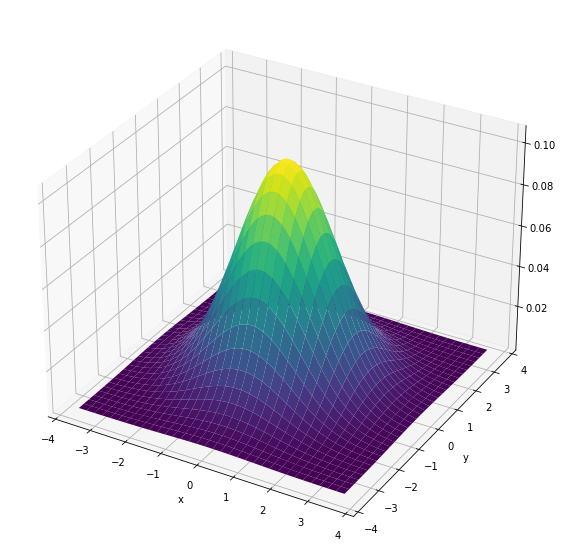

In [6]:
import numpy as np
from scipy.stats import multivariate_normal
from matplotlib import pyplot as plt
from matplotlib import cm
_ =gauss2d()